In [ ]:
# (C) Copyright IBM Corp. 2019, 2020, 2021, 2022.

#    Licensed under the Apache License, Version 2.0 (the "License");
#    you may not use this file except in compliance with the License.
#    You may obtain a copy of the License at

#           http://www.apache.org/licenses/LICENSE-2.0

#     Unless required by applicable law or agreed to in writing, software
#     distributed under the License is distributed on an "AS IS" BASIS,
#     WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
#     See the License for the specific language governing permissions and
#     limitations under the License.


In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.integrate import odeint

from simulai.math.differentiation import CollocationDerivative

In [3]:
class PreyGaussianDisturb:
    
    def __init__(self, A=None, sigma=None, mu=None, T_max=None):
        
        self.sigma = sigma
        self.mu = mu
        self.T_max = T_max
        self.A = A

    def basis(self, t=None):
        
          output = self.A*np.exp(-(t - self.mu)**2/self.sigma**2)
    
          return output
    
    def __call__(self, t=None):
        
        return self.basis(t=t)

In [4]:
n_cases = 30
A = 20
T_max = 150
functions = list()
n_functions = 1000
sigmas = [1, 5, 10]
mus = np.linspace(10, T_max-10, n_functions)

for ff in range(n_functions):
    
    function = PreyGaussianDisturb(A=A, sigma=random.choice(sigmas), mu=mus[ff])
    functions.append(function)

In [5]:
t = np.linspace(0, T_max, 1000)

for func in functions[::10]:
    curve = func(t=t)
    plt.plot(t, curve)

In [6]:
class LotkaVolterra:
    
    def __init__(self, alpha=None, beta=None, gamma=None, delta=None, forcing=None, lambd=None):
        
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.delta = delta
        self.forcing = forcing 
        self.lambd = lambd
        
    def eval(self, state:np.ndarray=None, t:float=None) -> np.ndarray:
        
        x = state[0]
        y = state[1]
        
        x_residual = self.alpha*x - self.beta*x*y# + self.forcing(t)*np.sqrt(self.lambd)
        y_residual = self.delta*x*y - self.gamma*y 
        
        return np.array([x_residual, y_residual])
    
    def run(self, initial_state, t):
            
        solution = odeint(self.eval, initial_state, t)

        return np.vstack(solution), self.forcing(t)

In [7]:
alpha = 1.1
beta = 0.4
gamma = 0.4
delta = 0.1
dt = 0.01
lambd= dt

t = np.arange(0, T_max, dt)
initial_state = np.array([20, 5])

output_dataset = list()
input_dataset = list()
diff_output_dataset = list()

diff = CollocationDerivative(config={})

for function in functions:

    solver = LotkaVolterra(alpha=alpha, beta=beta, gamma=gamma, delta=delta, forcing=function, lambd=lambd)

    solution, forcing = solver.run(initial_state, t)
    
    diff_solution = diff.solve(solution, x=t)
    
    input_dataset.append(forcing)
    output_dataset.append(solution)
    diff_output_dataset.append(diff_solution)

Performing Collocation Derivation.
Performing Collocation Derivation.
Performing Collocation Derivation.
Performing Collocation Derivation.
Performing Collocation Derivation.
Performing Collocation Derivation.
Performing Collocation Derivation.
Performing Collocation Derivation.
Performing Collocation Derivation.
Performing Collocation Derivation.
Performing Collocation Derivation.
Performing Collocation Derivation.
Performing Collocation Derivation.
Performing Collocation Derivation.
Performing Collocation Derivation.
Performing Collocation Derivation.
Performing Collocation Derivation.
Performing Collocation Derivation.
Performing Collocation Derivation.
Performing Collocation Derivation.
Performing Collocation Derivation.
Performing Collocation Derivation.
Performing Collocation Derivation.
Performing Collocation Derivation.
Performing Collocation Derivation.
Performing Collocation Derivation.
Performing Collocation Derivation.
Performing Collocation Derivation.
Performing Collocati

In [8]:
input_dataset_array = np.stack(input_dataset, axis=-1)

In [9]:
output_dataset_array = np.stack(output_dataset, axis=-1)

In [10]:
diff_output_dataset_array = np.stack(diff_output_dataset, axis=-1)

In [11]:
np.savez("Lotka_Volterra_dataset.npz", 
         input_dataset=input_dataset_array,
         output_dataset=output_dataset_array, time=t, diff_output_dataset=diff_output_dataset_array)

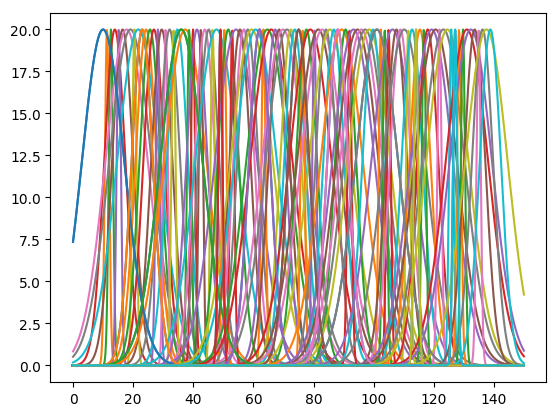

In [12]:
for ff in range(0, n_functions, 100):
    plt.plot(t,input_dataset_array[:, ff])
plt.show()

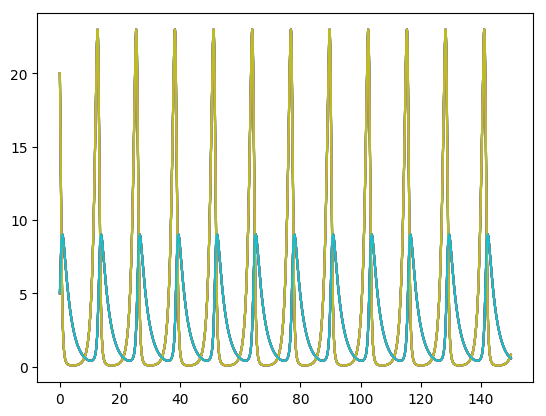

In [18]:
for ff in range(0, n_functions, 100):
    plt.plot(t,output_dataset_array[:,:,ff])
plt.show()

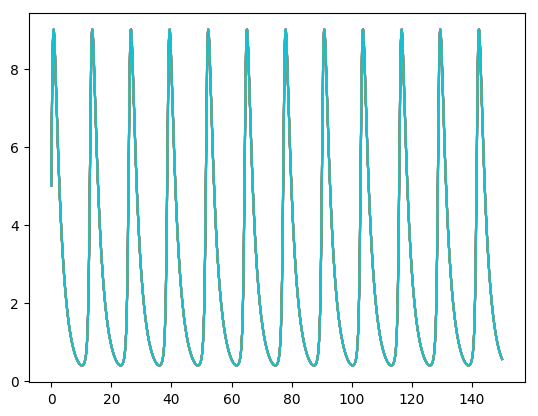

In [16]:
for ff in range(0, n_functions, 100):
    plt.plot(t,output_dataset_array[:,1,ff])
plt.show()